In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] = \
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0, np.nan)

<AxesSubplot:>

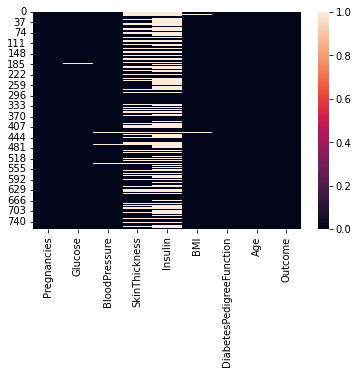

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.fillna(df.mean(), inplace=True)

<AxesSubplot:>

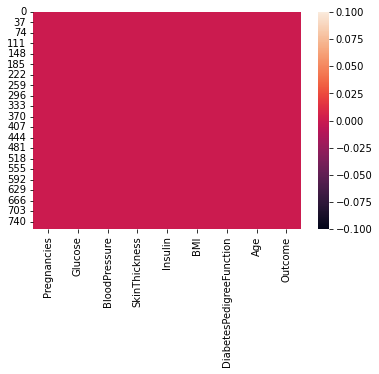

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

<AxesSubplot:>

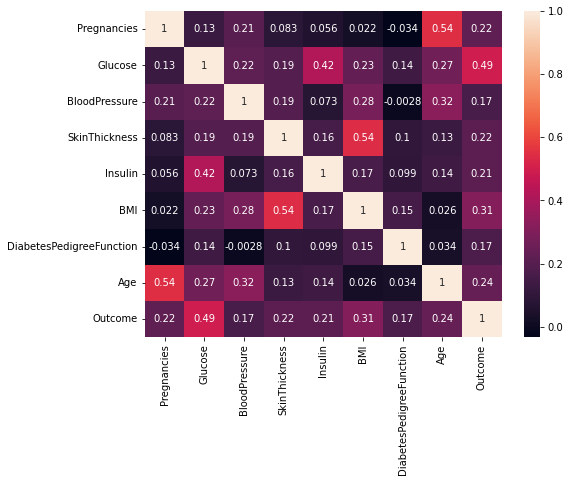

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)

In [13]:
X = df[['Glucose', 'BMI', 'Age']]
y = df['Outcome']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(7)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [19]:
predictions = knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       165
           1       0.65      0.60      0.62        89

    accuracy                           0.74       254
   macro avg       0.72      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



In [22]:
df.shape

(768, 9)

In [23]:
768/5

153.6

In [24]:
153*4

612

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
ks = list(range(1, 600, 2))

In [27]:
scores = []

In [28]:
for k in ks:
    knn = KNeighborsClassifier(k)
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
    scores.append(score)
    print(f"{k} neighbours accuracy: {score}")

1 neighbours accuracy: 0.6784059078176725
3 neighbours accuracy: 0.7201341142517613
5 neighbours accuracy: 0.7396400984636278
7 neighbours accuracy: 0.7526695526695526
9 neighbours accuracy: 0.7565486800780918
11 neighbours accuracy: 0.7604872251931075
13 neighbours accuracy: 0.7565571683218743
15 neighbours accuracy: 0.7630846277905101
17 neighbours accuracy: 0.7630761395467278
19 neighbours accuracy: 0.7708768355827178
21 neighbours accuracy: 0.7682964094728799
23 neighbours accuracy: 0.7643918173329938
25 neighbours accuracy: 0.7617774382480265
27 neighbours accuracy: 0.7644003055767762
29 neighbours accuracy: 0.7669977081741788
31 neighbours accuracy: 0.7617859264918089
33 neighbours accuracy: 0.7656735421441304
35 neighbours accuracy: 0.7604787369493252
37 neighbours accuracy: 0.7605042016806722
39 neighbours accuracy: 0.7644003055767762
41 neighbours accuracy: 0.7644172820643409
43 neighbours accuracy: 0.756574144809439
45 neighbours accuracy: 0.7578983108394872
47 neighbours acc

In [29]:
max(scores)

0.7708768355827178

In [30]:
scores.index(max(scores))

9

In [31]:
ks[9]

19

In [32]:
knn = KNeighborsClassifier(19)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       165
           1       0.69      0.60      0.64        89

    accuracy                           0.76       254
   macro avg       0.74      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254



In [33]:
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       165
           1       0.69      0.63      0.66        89

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.77      0.77      0.77       254



In [34]:
import pickle

In [35]:
pickle.dump(knn, open("model.pkl", "wb"))

In [37]:
saved_model = pickle.load(open("model.pkl", "rb"))

In [39]:
X.columns

Index(['Glucose', 'BMI', 'Age'], dtype='object')

In [41]:
saved_model.predict([[150, 25, 40]])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [43]:
prediction_proba = saved_model.predict_proba([[150, 25, 40]])
prediction_proba

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.63636364, 0.36363636]])

In [46]:
np.round(prediction_proba.max() * 100, 2)

63.64